In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv


In [2]:
data=pd.read_csv("/kaggle/input/heart-disease-uci/heart.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
#Normalization of our data
Data=(data-np.min(data)/np.max(data)-np.min(data))

K-Means Clustering

We have four step to follow in this unsupervised algorithm.
1. Choose k value
2. Assign random cenroid
3. Find data points distance according to euclidean distance and do clustering.
4. Find out new centroid until the place of cendroid do not change



What is WCSS? : 

To calculate WCSS, you first find the Euclidean distance (see figure below) between a given point and the centroid to which it is assigned. You then iterate this process for all points in the cluster, and then sum the values for the cluster and divide by the number of points.

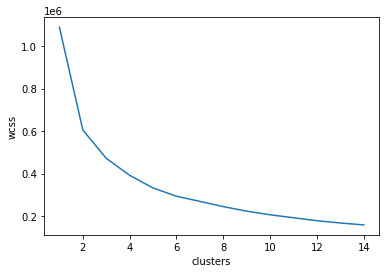

In [7]:
from sklearn.cluster import KMeans

wcss=[] #Within Cluster Sum of Square
for i in range(1,15):
    km=KMeans(n_clusters = i)# n_cluster is number of clusters
    km.fit(Data)
    wcss.append(km.inertia_)
    #inertia: how spread out the clusters are distance from each sample
    #lower inertia means more clusters
    
plt.plot(range(1,15),wcss)
plt.xlabel("clusters")
plt.ylabel("wcss")
plt.show()

Elbow point gives us the best number of clusters. So the best number of cluster is 3.


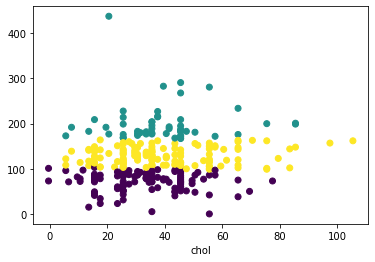

In [8]:
#Kmeans to 3 clusters
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)
km.fit(Data)
labels=km.predict(Data)

plt.scatter(Data['trestbps'],Data['chol'],c = labels)
plt.xlabel('trestbps')
plt.xlabel('chol')
plt.show()

Hierarchical Clustering

We use "euclidean distance" technique in this Clustering. We can calculate euclidean distance according to four thing.
1. According to closest two points
2. According to furthest two points
3. According to mean
4. According to centroid

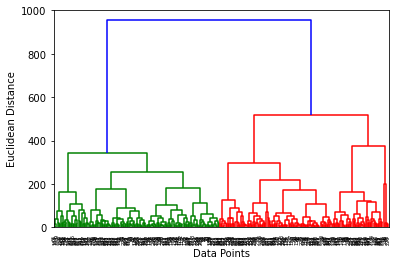

In [9]:
#h, dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram
merg=linkage(Data,method="ward")
dendrogram(merg,leaf_rotation=90)

plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()